## **Task 1**

In [ ]:
!pip install 'aif360[LFR]'

     |████████████████████████████████| 175 kB 20.4 MB/s 
     |████████████████████████████████| 564 kB 35.5 MB/s 
  Created wheel for memory-profiler: filename=memory_profiler-0.60.0-py3-none-any.whl size=31284 sha256=043e232ded89d050c4356844741fc515a15593d12f893f5d4247edd60ad76a20
  Stored in directory: /root/.cache/pip/wheels/67/2b/fb/326e30d638c538e69a5eb0aa47f4223d979f502bbdb403950f
Successfully built memory-profiler


In [ ]:
cd /usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult

/usr/local/lib/python3.7/dist-packages/aif360/data/raw/adult


Loading adult dataset

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test

--2022-05-11 02:57:17--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3974305 (3.8M) [application/x-httpd-php]
Saving to: ‘adult.data’

adult.data          100%[===================>]   3.79M  6.92MB/s    in 0.5s    

2022-05-11 02:57:18 (6.92 MB/s) - ‘adult.data’ saved [3974305/3974305]

--2022-05-11 02:57:18--  https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5229 (5.1K) [application/x-httpd-php]
Saving to: ‘adult.names’

adult.names         100%[===================>]   5.11K  --.-KB/s    in 0s      

2022-

In [ ]:
! pip install pytorch

  ERROR: Failed building wheel for pytorch
  Running setup.py clean for pytorch
Failed to build pytorch
    Running setup.py install for pytorch ... error
ERROR: Command errored out with exit status 1: /usr/bin/python3 -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-gjd13w20/pytorch_962e70a32ee64b1dbe112b56133d9193/setup.py'"'"'; __file__='"'"'/tmp/pip-install-gjd13w20/pytorch_962e70a32ee64b1dbe112b56133d9193/setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' install --record /tmp/pip-record-3j148gja/install-record.txt --single-version-externally-managed --compile --install-headers /usr/local/include/python3.7/pytorch Check the logs for full command output.


In [ ]:
!pip install fairlearn

     |████████████████████████████████| 177 kB 10.5 MB/s 


In [ ]:
#Code written by V Sharmanska. All rights reserved.

import numpy as np
from aif360.datasets import AdultDataset
from aif360.algorithms.preprocessing.optim_preproc_helpers.data_preproc_functions import load_preproc_data_adult
from aif360.metrics import ClassificationMetric
from aif360.algorithms.preprocessing.reweighing import Reweighing
import pdb
from sklearn.preprocessing import StandardScaler  #MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import *
import matplotlib.pyplot as plt
np.random.seed(0)

In [ ]:

privileged_groups = [{'sex': 1.0}]
unprivileged_groups = [{'sex': 0.0}]
dataset_orig = load_preproc_data_adult(['sex'])



train, test = dataset_orig.split([0.7], shuffle=True)
print("training data size", train.features.shape)
print("dataset feature names", train.feature_names)

#Normalize the dataset, both train and test. This should always be done in any machine learning pipeline!
scale_orig = StandardScaler()
X_train = scale_orig.fit_transform(train.features)
y_train = train.labels.ravel()

X_test = scale_orig.transform(test.features) 
y_test = test.labels.ravel()

training data size (34189, 18)
dataset feature names ['race', 'sex', 'Age (decade)=10', 'Age (decade)=20', 'Age (decade)=30', 'Age (decade)=40', 'Age (decade)=50', 'Age (decade)=60', 'Age (decade)=>=70', 'Education Years=6', 'Education Years=7', 'Education Years=8', 'Education Years=9', 'Education Years=10', 'Education Years=11', 'Education Years=12', 'Education Years=<6', 'Education Years=>12']


In [ ]:
#Code adopted from https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/



from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score 

# define dataset

# define models and parameters
model = LogisticRegression()
solvers = [ 'liblinear']
penalty = ['l2']
c_values = np.logspace(np.log10(100),np.log10(0.00001),num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
best_model = grid_result.best_estimator_
yhat = best_model.predict(X_test)
	# evaluate the model
acc = accuracy_score(y_test, yhat)
	# store the result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('accuracy',"%f (%f) with: %r" % (mean, stdev, param))

Best: 0.804089 using {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 42.81332398719393, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 18.329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 7.847599703514615, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 3.3598182862837827, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 1.438449888287663, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 0.6158482110660267, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 0.26366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 0.11288378916846895, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) wi

In [ ]:
learner = LogisticRegression(solver='liblinear', random_state=1, C = 0.01, penalty = "l2") 
learner.fit(X_train,y_train)
predictions = learner.predict(X_test)

test_pred = test.copy()
test_pred.labels = predictions
print("Accuracy", sum(predictions==y_test)/len(y_test))
metric = ClassificationMetric(test, test_pred, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
print(metric_arrs)

Accuracy 0.8042039172865625
{'eq_opp_diff': -0.4414141414141414}


In [ ]:
from sklearn.model_selection import cross_validate
learner = LogisticRegression(solver='liblinear', random_state=1, C = 0.01, penalty = "l2") 
learner.fit(X_train,y_train)
predictions = learner.predict(X_test)
cv_results = cross_validate(learner,X_train,y_train,cv = 5,return_estimator = True)

cv_results['test_score']
cv_model = cv_results['estimator'][list(cv_results['test_score']).index(max(cv_results['test_score']))]

cv_predictions = test.copy()
cv_predictions.labels = cv_model.predict(test.features).reshape(-1,1)

# Measure Fairness metrics
metric = ClassificationMetric(test, cv_predictions, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)

{'eq_opp_diff': 0.0, 'avg_odds_diff': 0.0, 'bal_acc': 0.5, 'disp_imp': nan}


invalid value encountered in double_scalars


Logistic Regression With PyTorch

In [ ]:
import torch
from torch.autograd import Variable
import torchvision.transforms as transforms
import torchvision.datasets as dsets
import torch.utils.data as Data

In [ ]:
class LogisticRegression_torch(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression_torch, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [ ]:
GPU = True
device_idx = 0
if GPU:
    device = torch.device("cuda:" + str(device_idx) if torch.cuda.is_available() else "cpu")
else:
    device = torch.device("cpu")
BATCH_SIZE = 64
learning_rate = 0.0001

# building a DataTensor
train_dataset = Data.TensorDataset(torch.tensor(X_train).float(), torch.Tensor(y_train).float())

if device == 0:
    num_workers = 2
else:
    num_workers = 0

# Data Loader for training the model
loader_train = Data.DataLoader(
    dataset=train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=True, num_workers=num_workers)

In [ ]:
#Code adopted from https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/
criterion = torch.nn.BCELoss(reduction='sum')
epochs = 3
accuracies = []
metrix = {}
lambdas = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7, 0.9]
lambdas = np.concatenate((np.array(lambdas), np.linspace(1, 100, num=100)))
for r_lambda in lambdas:
    print('Lambda:', r_lambda,'\n')
    model = LogisticRegression_torch(X_train.shape[1], 1)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)  
    for epoch in range(epochs):
        train_loss = 0.0
        for i, (x, y) in enumerate(loader_train):
        #using input and labels for training 

            inputs = Variable(x.to(device))
            labels = Variable(y.to(device))

          
            optimizer.zero_grad()

            # using input getting the output
            outputs = model(inputs)

            # Regularization factor
            reg = 0
            for param in model.parameters():
                reg += 0.5 * (param ** 2).sum()

            # find loss for output
            loss = criterion(outputs.reshape(outputs.shape[0]), labels) + \
                r_lambda * reg
                
            train_loss += loss.item()
            
            # get gradients w.r.t to parameters
            loss.backward()
            
            # update parameters
            optimizer.step()
        

        print('epoch [{}/{}], Training loss:{:.6f}'.format(
            epoch + 1, 
            epochs, 
            train_loss / len(loader_train.dataset))) #training has finished 
    with torch.no_grad():
        model.eval()
        out = model(Variable(torch.Tensor(X_test).to(device))).detach().cpu()
        pred = (out >= 0.5).int().numpy().squeeze()
        accuracy = sum((y_test == pred))/len(y_test)
    #accuracy from validation

    print('Accuracy: ', accuracy,'\n')
    accuracies.append(accuracy)

    test_pred = test.copy()
    test_pred.labels = pred.reshape(-1,1)
    metric = ClassificationMetric(test, test_pred,unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs = {}
    metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
    print(metric_arrs)

    metrix[r_lambda] = {}
    metrix[r_lambda]['accuracy'] = accuracy
    metrix[r_lambda]['privilaged'] = metric.performance_measures(privileged=True)
    metrix[r_lambda]['unprivilaged'] = metric.performance_measures(privileged=False)

    met = metric.binary_confusion_matrix(privileged=True)
    PR_priv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix[r_lambda]['privilaged']['PR'] = PR_priv

    met = metric.binary_confusion_matrix(privileged=False)
    PR_unpriv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix[r_lambda]['unprivilaged']['PR'] = PR_unpriv

Lambda: 0.0 

epoch [1/3], Training loss:0.586180
epoch [2/3], Training loss:0.473647
epoch [3/3], Training loss:0.445917
Accuracy:  0.8038626902340817 

{'eq_opp_diff': -0.435016835016835}
Lambda: 1e-05 

epoch [1/3], Training loss:0.597402
epoch [2/3], Training loss:0.475149
epoch [3/3], Training loss:0.446723
Accuracy:  0.8050228622125162 

{'eq_opp_diff': -0.4377104377104377}
Lambda: 0.0001 

epoch [1/3], Training loss:0.576622
epoch [2/3], Training loss:0.473604
epoch [3/3], Training loss:0.446437
Accuracy:  0.801610591687709 

{'eq_opp_diff': -0.3692411924119241}
Lambda: 0.001 

epoch [1/3], Training loss:0.593786
epoch [2/3], Training loss:0.480416
epoch [3/3], Training loss:0.449420
Accuracy:  0.8023612912031666 

{'eq_opp_diff': -0.35307957625030795}
Lambda: 0.01 

epoch [1/3], Training loss:0.614691
epoch [2/3], Training loss:0.481845
epoch [3/3], Training loss:0.449285
Accuracy:  0.8027025182556473 

{'eq_opp_diff': -0.35947688264761435}
Lambda: 0.1 

epoch [1/3], Training l

Text(0, 0.5, 'Accuracy')

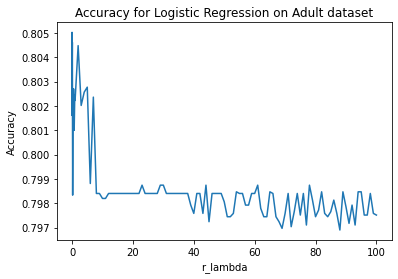

In [ ]:
plt.plot(lambdas, accuracies)
plt.title('Accuracy for Logistic Regression on Adult dataset')
plt.xlabel('r_lambda')
plt.ylabel('Accuracy')

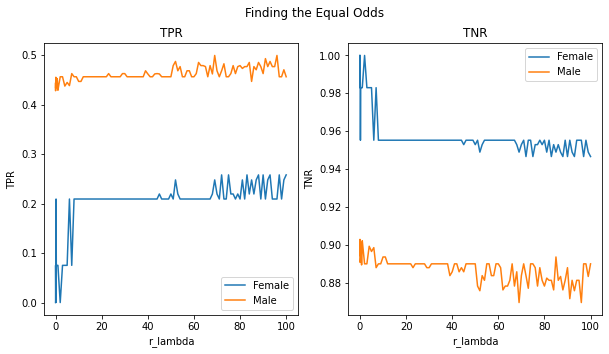

In [ ]:
TPR_priv = []
TPR_non_priv = []
TNR_priv = []
TNR_non_priv = []
for l in metrix:
    TPR_priv.append(metrix[l]['privilaged']['TPR'])
    TPR_non_priv.append(metrix[l]['unprivilaged']['TPR'])
    TNR_priv.append(metrix[l]['privilaged']['TNR'])
    TNR_non_priv.append(metrix[l]['unprivilaged']['TNR'])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Finding the Equal Odds')
axs[0].plot(lambdas, TPR_non_priv)
axs[0].plot(lambdas, TPR_priv)
axs[0].set_title('TPR')
axs[0].set(xlabel='r_lambda', ylabel='TPR')
axs[0].legend(['Female', 'Male'])

axs[1].plot(lambdas, TNR_non_priv)
axs[1].plot(lambdas, TNR_priv)
axs[1].set_title('TNR')
axs[1].set(xlabel='r_lambda', ylabel='TNR')
axs[1].legend(['Female', 'Male'])

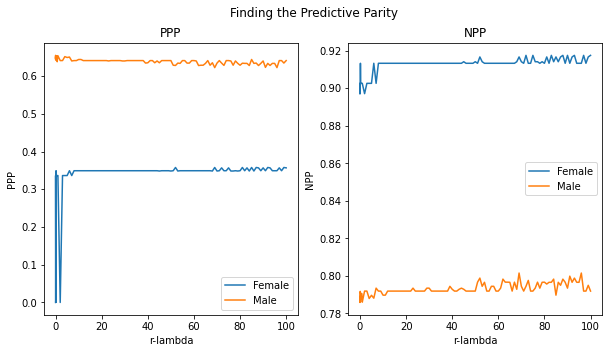

In [ ]:
PPP_priv= []
PPP_non_priv= []
NPP_priv= []
NPP_non_priv = []
for l in metrix:
    PPP_priv.append(metrix[l]['privilaged']['PPV'])
    PPP_non_priv.append(metrix[l]['unprivilaged']['PPV'])
    NPP_priv.append(metrix[l]['privilaged']['NPV'])
    NPP_non_priv.append(metrix[l]['unprivilaged']['NPV'])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Finding the Predictive Parity')
axs[0].plot(lambdas, PPP_non_priv)
axs[0].plot(lambdas, PPP_priv)
axs[0].set_title('PPP')
axs[0].set(xlabel='r-lambda', ylabel='PPP')
axs[0].legend(['Female', 'Male'])

axs[1].plot(lambdas, NPP_non_priv)
axs[1].plot(lambdas, NPP_priv)
axs[1].set_title('NPP')
axs[1].set(xlabel='r-lambda', ylabel='NPP')
axs[1].legend(['Female', 'Male'])

## **TASK 2**

In [ ]:
RW = Reweighing(unprivileged_groups=unprivileged_groups, 
                privileged_groups=privileged_groups)

train_rw = RW.fit_transform(train)

train_weights = train_rw.instance_weights

In [ ]:
# Code adopted from https://machinelearningmastery.com/hyperparameter-optimization-with-random-search-and-grid-search/
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score 

# define dataset


# define models and parameters
model = LogisticRegression()
solvers = [ 'liblinear']
penalty = ['l2']
c_values = np.logspace(np.log10(100),np.log10(0.00001),num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)
best_model = grid_result.best_estimator_
yhat = best_model.predict(X_test)
	# evaluate the model
acc = accuracy_score(y_test, yhat)
	# store the result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('accuracy',"%f (%f) with: %r" % (mean, stdev, param))

Best: 0.804089 using {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 42.81332398719393, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 18.329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 7.847599703514615, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 3.3598182862837827, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 1.438449888287663, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 0.6158482110660267, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 0.26366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) with: {'C': 0.11288378916846895, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 0.804089 (0.004089) wi

In [ ]:
from sklearn.model_selection import cross_validate
learner = LogisticRegression(solver='liblinear', random_state=1, C = 0.01, penalty = "l2") 
learner.fit(X_train,y_train)
predictions = learner.predict(X_test)
cv_results = cross_validate(learner,X_train,y_train,cv =5,return_estimator = True)

cv_results['test_score']
cv_model = cv_results['estimator'][list(cv_results['test_score']).index(max(cv_results['test_score']))]

cv_predictions = test.copy()
cv_predictions.labels = cv_model.predict(test.features).reshape(-1,1)

# Measure Fairness metrics
metric = ClassificationMetric(test, cv_predictions, unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
metric_arrs = {}
metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
metric_arrs['avg_odds_diff']=(metric.average_odds_difference())
metric_arrs['bal_acc']=((metric.true_positive_rate() + metric.true_negative_rate()) / 2)
metric_arrs['disp_imp']=(metric.disparate_impact())
print(metric_arrs)

{'eq_opp_diff': 0.0, 'avg_odds_diff': 0.0, 'bal_acc': 0.5, 'disp_imp': nan}


invalid value encountered in double_scalars


In [ ]:
# weight Tensor
weights = torch.FloatTensor(train_rw.instance_weights)

BATCH_SIZE = 64
learning_rate = 0.0001


# weight and reweight with tensordataset
rw_train_dataset = Data.TensorDataset(torch.tensor(X_train).float(), 
                                      torch.Tensor(y_train).float(), 
                                      weights)
# Loading data 
loader_train = Data.DataLoader(
    dataset=rw_train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False, num_workers=num_workers)

In [ ]:
#Code adopted from https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/
epochs = 5
accuracies = []
metrix_rw = {}
lambdas = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
lambdas = np.concatenate((np.array(lambdas), np.linspace(1, 10, num=10)))
for r_lambda in lambdas:
    model = LogisticRegression_torch(X_train.shape[1], 1)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
    for epoch in range(epochs):
        train_loss = 0.0
        for i, (x, y, w) in enumerate(loader_train):
        

            inputs = Variable(x.to(device))
            labels = Variable(y.to(device))

             
           
            optimizer.zero_grad()

            
            outputs = model(inputs)

            # Regularization
            reg = 0
            for param in model.parameters():
                reg += 0.5 * (param ** 2).mean()
                #reg += param.abs().sum()
            # r_lambda = 0
            
            # criterion
            criterion = torch.nn.BCELoss(weight=w, reduction='sum')
            # get loss for the predicted output
            loss = criterion(outputs.reshape(outputs.shape[0]), labels) + \
                r_lambda * reg
            
                
            train_loss += loss.item()
            
            # get gradients w.r.t to parameters
            loss.backward()
            
            # update parameters
            optimizer.step()
        #training done

        print('epoch [{}/{}], Training loss:{:.6f}'.format(
            epoch + 1, 
            epochs, 
            train_loss / len(loader_train.dataset)))
    with torch.no_grad():
        model.eval()
        out = model(Variable(torch.Tensor(X_test).to(device))).detach().cpu()
        pred = (out >= 0.5).int().numpy().squeeze()
        accuracy = sum((y_test == pred))/len(y_test)
        print('Accuracy: ', accuracy)
        accuracies.append(accuracy)
#testing done
    test_pred = test.copy()
    test_pred.labels = pred.reshape(-1,1)
    metric_rew = ClassificationMetric(test, test_pred,unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
    metric_arrs = {}
    metric_arrs['eq_opp_diff']=(metric.equal_opportunity_difference())
    print(metric_arrs)
    
    metrix_rw[r_lambda] = {}
    metrix_rw[r_lambda]['accuracy'] = accuracy
    metrix_rw[r_lambda]['privilaged'] = metric_rew.performance_measures(privileged=True)
    metrix_rw[r_lambda]['unprivilaged'] = metric_rew.performance_measures(privileged=False)

    met = metric_rew.binary_confusion_matrix(privileged=True)
    PR_priv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix_rw[r_lambda]['privilaged']['PR'] = PR_priv

    met = metric_rew.binary_confusion_matrix(privileged=False)
    PR_unpriv = (met['TP'] + met['FP']) / (met['TP'] + met['FP'] + met['TN'] + met['FN'])
    metrix_rw[r_lambda]['unprivilaged']['PR'] = PR_unpriv

epoch [1/5], Training loss:0.562379
epoch [2/5], Training loss:0.482955
epoch [3/5], Training loss:0.461448
epoch [4/5], Training loss:0.453151
epoch [5/5], Training loss:0.449210
Accuracy:  0.7905548351873336
{'eq_opp_diff': -0.19843557526484357}
epoch [1/5], Training loss:0.584412
epoch [2/5], Training loss:0.487166
epoch [3/5], Training loss:0.463144
epoch [4/5], Training loss:0.453966
epoch [5/5], Training loss:0.449625
Accuracy:  0.7905548351873336
{'eq_opp_diff': -0.19843557526484357}
epoch [1/5], Training loss:0.603322
epoch [2/5], Training loss:0.492960
epoch [3/5], Training loss:0.465044
epoch [4/5], Training loss:0.454690
epoch [5/5], Training loss:0.449924
Accuracy:  0.7905548351873336
{'eq_opp_diff': -0.19843557526484357}
epoch [1/5], Training loss:0.621426
epoch [2/5], Training loss:0.494599
epoch [3/5], Training loss:0.465088
epoch [4/5], Training loss:0.454613
epoch [5/5], Training loss:0.449909
Accuracy:  0.7905548351873336
{'eq_opp_diff': -0.19843557526484357}
epoch [1

Text(0, 0.5, 'Accuracy')

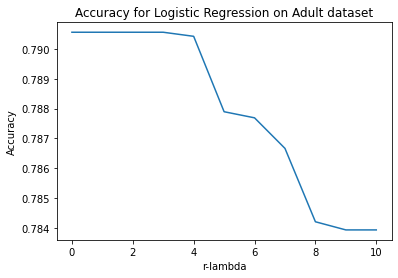

In [ ]:
plt.plot(lambdas, accuracies)
plt.title('Accuracy for Logistic Regression on Adult dataset')
plt.xlabel('r-lambda')
plt.ylabel('Accuracy')

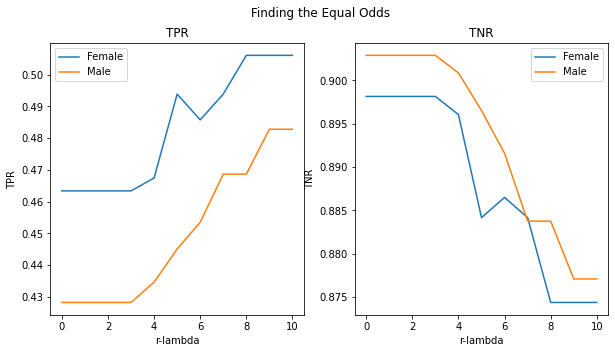

In [ ]:
TPR_priv_rw = []
TPR_non_priv_rw = []
TNR_priv_rw = []
TNR_non_priv_rw = []
for l in metrix_rw:
    TPR_priv_rw.append(metrix_rw[l]['privilaged']['TPR'])
    TPR_non_priv_rw.append(metrix_rw[l]['unprivilaged']['TPR'])
    TNR_priv_rw.append(metrix_rw[l]['privilaged']['TNR'])
    TNR_non_priv_rw.append(metrix_rw[l]['unprivilaged']['TNR'])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Finding the Equal Odds')
axs[0].plot(lambdas, TPR_non_priv_rw)
axs[0].plot(lambdas, TPR_priv_rw)
axs[0].set_title('TPR')
axs[0].set(xlabel='r-lambda', ylabel='TPR')
axs[0].legend(['Female', 'Male'])

axs[1].plot(lambdas, TNR_non_priv_rw)
axs[1].plot(lambdas, TNR_priv_rw)
axs[1].set_title('TNR')
axs[1].set(xlabel='r-lambda', ylabel='TNR')
axs[1].legend(['Female', 'Male'])

[(0.2, 1.0)]

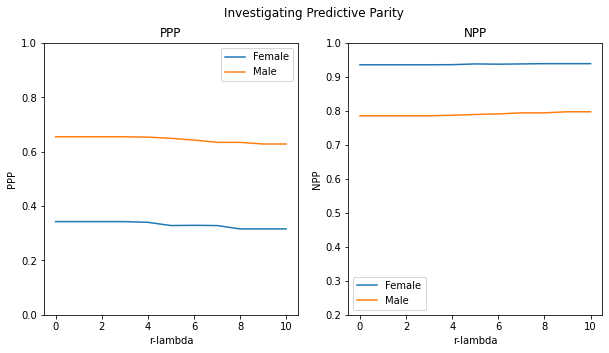

In [ ]:
PPP_priv_rw = []
PPP_non_priv_rw = []
NPP_priv_rw = []
NPP_non_priv_rw = []
for l in metrix_rw:
    PPP_priv_rw.append(metrix_rw[l]['privilaged']['PPV'])
    PPP_non_priv_rw.append(metrix_rw[l]['unprivilaged']['PPV'])
    NPP_priv_rw.append(metrix_rw[l]['privilaged']['NPV'])
    NPP_non_priv_rw.append(metrix_rw[l]['unprivilaged']['NPV'])

fig, axs = plt.subplots(1, 2, figsize=(10,5))
fig.suptitle('Investigating Predictive Parity')
axs[0].plot(lambdas, PPP_non_priv_rw)
axs[0].plot(lambdas, PPP_priv_rw)
axs[0].set_title('PPP')
axs[0].set(xlabel='r-lambda', ylabel='PPP')
axs[0].legend(['Female', 'Male'])
axs[0].set(ylim=(0,1))

axs[1].plot(lambdas, NPP_non_priv_rw)
axs[1].plot(lambdas, NPP_priv_rw)
axs[1].set_title('NPP')
axs[1].set(xlabel='r-lambda', ylabel='NPP')
axs[1].legend(['Female', 'Male'])
axs[1].set(ylim=(0.2,1))

# **Task 3**

## Model selection

In [ ]:
BATCH_SIZE = 32
learning_rate = 0.0001


if device == 0:
    num_workers = 2
else:
    num_workers = 0


def get_loader(x_train, y_train, W):
    train_dataset = Data.TensorDataset(torch.tensor(x_train).float(), 
                                      torch.Tensor(y_train).float(), 
                                      W.float())
    
    return Data.DataLoader(dataset=train_dataset,
                           batch_size=BATCH_SIZE, 
                           shuffle=True, num_workers=num_workers)
  

In [ ]:
#reweighihting
W = torch.FloatTensor(train_rw.instance_weights)
loader_train = get_loader(X_train, y_train, W)

In [ ]:
class LogisticRegression(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [ ]:
#Code adopted from https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/
r_lambda = 24
num_splits = 5
ACC=[]
for split in range(num_splits):
    
    
    loader_train = get_loader(X_train, y_train, W)
    model = LogisticRegression_torch(X_train.shape[1], 1)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)

    for epoch in range(epochs):
        train_loss = 0.0
        for i, (x, y, w) in enumerate(loader_train):
        

            inputs = Variable(x.to(device))
            labels = Variable(y.to(device))

            
            optimizer.zero_grad()

           
            outputs = model(inputs)

            # Regularization
            reg = 0
            for param in model.parameters():
                reg += 0.5 * (param ** 2).mean()
            
            
            criterion = torch.nn.BCELoss(weight=w, reduction='sum')
            # get loss for the predicted output
            loss = criterion(outputs.reshape(outputs.shape[0]), labels) + \
                r_lambda * reg
            
                
            train_loss += loss.item()
            
            
            loss.backward()
            
            
            optimizer.step()
        

        print('epoch [{}/{}], Training loss:{:.6f}'.format(
            epoch + 1, 
            epochs, 
            train_loss / len(loader_train.dataset)))
        #training finish
    with torch.no_grad():
        model.eval()
        out = model(Variable(torch.Tensor(X_test).to(device))).detach().cpu()
        pred = (out >= 0.5).int().numpy().squeeze()
        accuracy = sum((y_test == pred))/len(y_test)

    ACC.append(accuracy)

    
print('\nAccuracy:')
print('Mean:', np.mean(ACC), 'S.D.:', np.std(ACC))

epoch [1/5], Training loss:0.662785
epoch [2/5], Training loss:0.598567
epoch [3/5], Training loss:0.593424
epoch [4/5], Training loss:0.592666
epoch [5/5], Training loss:0.592485
epoch [1/5], Training loss:0.638230
epoch [2/5], Training loss:0.598300
epoch [3/5], Training loss:0.593614
epoch [4/5], Training loss:0.592829
epoch [5/5], Training loss:0.592609
epoch [1/5], Training loss:0.670833
epoch [2/5], Training loss:0.599540
epoch [3/5], Training loss:0.593619
epoch [4/5], Training loss:0.592780
epoch [5/5], Training loss:0.592583
epoch [1/5], Training loss:0.636478
epoch [2/5], Training loss:0.596220
epoch [3/5], Training loss:0.592948
epoch [4/5], Training loss:0.592475
epoch [5/5], Training loss:0.592398
epoch [1/5], Training loss:0.635102
epoch [2/5], Training loss:0.596632
epoch [3/5], Training loss:0.593132
epoch [4/5], Training loss:0.592579
epoch [5/5], Training loss:0.592433

Accuracy:
Mean: 0.7615368866443731 S.D.: 0.0015286971951136152


## EXTRA TASK

Analysis of algorithmic fairness methods beyond binary sensitive features, for
example, using Race. 

In [ ]:
# Priviled are the white male
privileged_groups = [{'sex': 1, 'race': 1}]
unprivileged_groups = [{'sex': 1, 'race': 0}, {'sex': 0, 'race': 0}, {'sex': 0, 'race': 1}]

In [ ]:
class LogisticRegression_torch(torch.nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LogisticRegression_torch, self).__init__()
        self.linear = torch.nn.Linear(input_dim, output_dim)

    def forward(self, x):
        outputs = torch.sigmoid(self.linear(x))
        return outputs

In [ ]:
device = torch.device("cpu")
BATCH_SIZE = 32
learning_rate = 0.0001

# Data Tensor
train_dataset = Data.TensorDataset(torch.tensor(X_train).float(), torch.Tensor(y_train).float())

if device == 0:
    num_workers = 2
else:
    num_workers = 0

# Data Loader
loader_train = Data.DataLoader(
    dataset=rw_train_dataset, 
    batch_size=BATCH_SIZE, 
    shuffle=False, num_workers=num_workers)


In [ ]:
#Code adopted from https://www.analyticsvidhya.com/blog/2021/07/perform-logistic-regression-with-pytorch-seamlessly/
from sklearn.metrics import confusion_matrix as CM
epochs = 4

metrix_rw = {}

lambdas = [0.0, 0.00001, 0.0001, 0.001, 0.01, 0.1]
lambdas = np.concatenate((np.array(lambdas), np.linspace(1, 10, num=10)))
for r_lambda in lambdas:
    model = LogisticRegression_torch(X_train.shape[1], 1)
    optimizer = torch.optim.SGD(model.parameters(), lr=0.0001)
    print('Lambda:', r_lambda,'\n')
    for epoch in range(epochs):
        train_loss = 0.0
        for i, (x, y, w) in enumerate(loader_train):
       

            inputs = Variable(x.to(device))
            labels = Variable(y.to(device))

           
            optimizer.zero_grad()

            
            outputs = model(inputs)

            
            reg = 0
            for param in model.parameters():
                reg += 0.5 * (param ** 2).mean()
            
           
            criterion = torch.nn.BCELoss(weight=w, reduction='sum')
           
            loss = criterion(outputs.reshape(outputs.shape[0]), labels) + \
                r_lambda * reg
            
                
            train_loss += loss.item()
            
            
            loss.backward()
            
            
            optimizer.step()
        
#training has finished
        print('epoch [{}/{}], Training loss:{:.6f}'.format(
            epoch + 1, 
            epochs, 
            train_loss / len(loader_train.dataset))) #testing started
    with torch.no_grad():
        model.eval()
        out = model(Variable(torch.Tensor(X_test).to(device))).detach().cpu()
        pred = (out >= 0.5).int().numpy().squeeze()
    
    accuracy = sum((y_test == pred))/len(y_test)
    print('Accuracy: ', accuracy,'\n')

    test_pred = test.copy()
    test_pred.labels = pred.reshape(-1,1)
    #White Men 
    white_male = test.labels[(( test.features[:,1] == 1.0) & ( test.features[:,0] == 1.0))]
    white_male_pred = pred[(( test.features[:,1] == 1.0) & ( test.features[:,0] == 1.0))]
    #Nonwhite Men
    nonwhite_male =  test.labels[(( test.features[:,1] == 1.0) & ( test.features[:,0] == 0.0))]
    nonwhite_male_pred = pred[(( test.features[:,1] == 1.0) & ( test.features[:,0] == 0.0))]

    #White Female
    white_female =  test.labels[(( test.features[:,1] == 0.0) & ( test.features[:,0] == 1.0))]
    white_female_pred = pred[(( test.features[:,1] == 0.0) & ( test.features[:,0] == 1.0))]
    #Nonwhite Men
    nonwhite_female =  test.labels[(( test.features[:,1] == 0.0) & ( test.features[:,0] == 0.0))]
    nonwhite_female_pred = pred[(( test.features[:,1] == 0.0) & ( test.features[:,0] == 0.0))]
        
    metrix_rw[r_lambda] = {}
    metrix_rw[r_lambda]['accuracy'] = accuracy
    metrix_rw[r_lambda]['privilaged'] = {}
    metrix_rw[r_lambda]['unprivilaged'] = {}

    # GET TPR and TNR for each unique group
    tn, fp, fn, tp = CM(white_male, white_male_pred).ravel()
    metrix_rw[r_lambda]['privilaged']['White Male'] =  (tp/(tp+fn), tn/(tn+fp))


    tn, fp, fn, tp = CM(nonwhite_male, nonwhite_male_pred).ravel()
    metrix_rw[r_lambda]['unprivilaged']['Nonwhite Male'] = (tp/(tp+fn), tn/(tn+fp))


    tn, fp, fn, tp = CM(nonwhite_female, nonwhite_female_pred).ravel()
    metrix_rw[r_lambda]['unprivilaged']['Nonwhite Female'] = (tp/(tp+fn), tn/(tn+fp))


    tn, fp, fn, tp = CM(white_female, white_female_pred).ravel()
    metrix_rw[r_lambda]['unprivilaged']['White Female'] = (tp/(tp+fn), tn/(tn+fp))

Lambda: 0.0 

epoch [1/4], Training loss:0.611689
epoch [2/4], Training loss:0.494943
epoch [3/4], Training loss:0.465829
epoch [4/4], Training loss:0.455133
Accuracy:  0.7905548351873336 

Lambda: 1e-05 

epoch [1/4], Training loss:0.589176
epoch [2/4], Training loss:0.489619
epoch [3/4], Training loss:0.463895
epoch [4/4], Training loss:0.454255
Accuracy:  0.7905548351873336 

Lambda: 0.0001 

epoch [1/4], Training loss:0.587050
epoch [2/4], Training loss:0.486700
epoch [3/4], Training loss:0.462893
epoch [4/4], Training loss:0.453916
Accuracy:  0.7905548351873336 

Lambda: 0.001 

epoch [1/4], Training loss:0.587995
epoch [2/4], Training loss:0.487787
epoch [3/4], Training loss:0.462594
epoch [4/4], Training loss:0.453444
Accuracy:  0.7905548351873336 

Lambda: 0.01 

epoch [1/4], Training loss:0.609936
epoch [2/4], Training loss:0.493280
epoch [3/4], Training loss:0.465136
epoch [4/4], Training loss:0.454959
Accuracy:  0.7905548351873336 

Lambda: 0.1 

epoch [1/4], Training loss:0

[Text(0, 0.5, 'Accuracy'), Text(0.5, 0, 'r-lambda')]

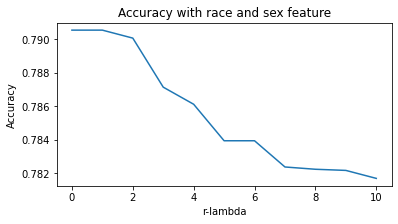

In [ ]:
ACC  = []
for l in metrix_rw:
    ACC.append(metrix_rw[l]['accuracy'])


fig, axs = plt.subplots(1, 1, figsize=(6,3))
axs.plot(lambdas, ACC)
axs.set_title('Accuracy with race and sex feature')
axs.set(xlabel='r-lambda', ylabel = 'Accuracy')

### Excluding the sensetive attribute "Gende or Sex"

In [ ]:
df.describe()

,race,sex,Income Binary,Age (decade)=10,Age (decade)=20,Age (decade)=30,Age (decade)=40,Age (decade)=50,Age (decade)=60,Age (decade)=>=70,Education Years=6,Education Years=7,Education Years=8,Education Years=9,Education Years=10,Education Years=11,Education Years=12,Education Years=<6,Education Years=>12
count,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000,48842.000000
mean,0.855043,0.668482,0.239282,0.051390,0.245793,0.264711,0.219565,0.135519,0.062528,0.020495,0.028439,0.037099,0.013452,0.323164,0.222718,0.042197,0.032779,0.052209,0.247942
std,0.352061,0.470764,0.426649,0.220795,0.430561,0.441184,0.413956,0.342280,0.242115,0.141686,0.166224,0.189007,0.115199,0.467690,0.416075,0.201041,0.178060,0.222451,0.431823
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


lets check the dataframe of adult data set

Drop down the sex column to check further analysis

In [ ]:
df=df.drop(columns=['sex'])

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split


target_attribute = df['race']

x_train, x_test, Y_train, Y_test = train_test_split(df, target_attribute, test_size=0.3)

In [ ]:
#  logistic regression
from sklearn.datasets import make_blobs
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score 

# define dataset


# define models and parameters
model = LogisticRegression()
solvers = [ 'liblinear']
penalty = ['l2']
c_values = np.logspace(np.log10(100),np.log10(0.00001),num=20)
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=1, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, Y_train)
best_model = grid_result.best_estimator_
yhat = best_model.predict(x_test)
	# evaluate the model
acc = accuracy_score(Y_test, yhat)
	# store the result
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('accuracy',"%f (%f) with: %r" % (mean, stdev, param))

Best: 1.000000 using {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 100.0, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 42.81332398719393, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 18.329807108324356, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 7.847599703514615, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 3.3598182862837827, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 1.438449888287663, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 0.6158482110660267, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 0.26366508987303583, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) with: {'C': 0.11288378916846895, 'penalty': 'l2', 'solver': 'liblinear'}
accuracy 1.000000 (0.000000) wi

Adult Data Analysis

In [ ]:
from sklearn.linear_model import LogisticRegression

#creating model 
classifier = (LogisticRegression())

#fitting  training data to model
classifier.fit(X_train , y_train)

y_pred = classifier.predict(X_test)
#print(list(zip(y_test , y_pred)))

In [ ]:
#Precision, recall, F1 score 
from sklearn.metrics import confusion_matrix , accuracy_score , classification_report

cfm = confusion_matrix(y_test , y_pred)

print( cfm , "\n")

print(  classification_report(y_test , y_pred) , "\n")

acc = accuracy_score(y_test , y_pred)
print("accuracy :" , acc)

[[10473   718]
 [ 2151  1311]] 

              precision    recall  f1-score   support

         0.0       0.83      0.94      0.88     11191
         1.0       0.65      0.38      0.48      3462

    accuracy                           0.80     14653
   macro avg       0.74      0.66      0.68     14653
weighted avg       0.79      0.80      0.78     14653
 

accuracy : 0.8042039172865625


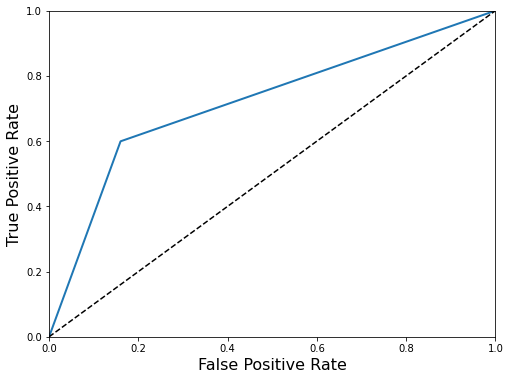

In [ ]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

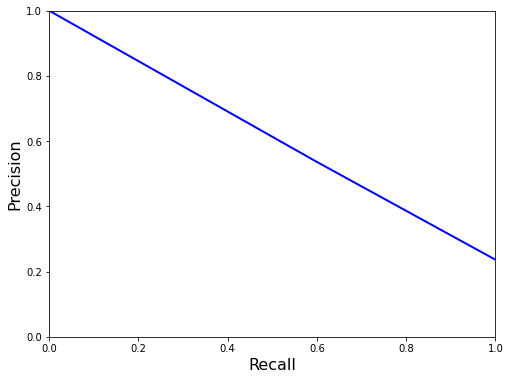

In [ ]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_test.tolist() , y_pred_class)
def  plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()

Male
<=40k: 22732 	>50k: 9918 	Total: 32650
Female
<=40k: 14423 	>50k: 1769 	Total: 16192

				Total: 48842


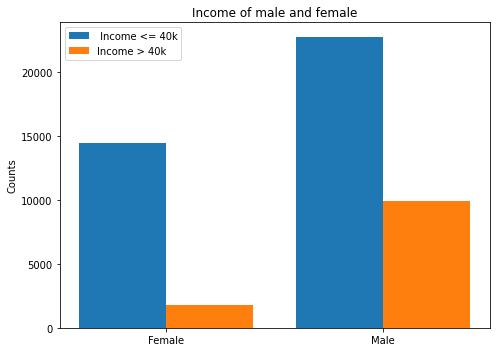

In [ ]:
df = dataset_orig.metadata['params']['df'].copy()
#biasness with the help of income
male_more_40k = sum(df[((df['sex'] == 1.0))]['Income Binary'] == 1.0)
#check with the income bracket of 40K

female_40k = sum(df[((df['sex'] == 0.0))]['Income Binary'] == 0.0)
male_40k = sum(df[((df['sex'] == 1.0))]['Income Binary'] == 0.0)

female_40k = sum(df[((df['sex'] == 0.0))]['Income Binary'] == 1.0)

print('Male')
print('<=40k:', male_40k,'\t>40k:', male_40k, '\tTotal:', male_40k + male_40k)
print('Female')
print('<=40k:', female_40k, '\t>40k:', female_40k, '\tTotal:', female_40k + female_40k)
print('\n\t\t\t\tTotal:', male_40k + male_40k + female_40k + female_40k)

labels = ['Female', 'Male']
less_50k = [female_40k, male_40k]
more_50k = [female_40k, male_40k]

x = np.arange(len(labels))  
width = 0.4  

fig, ax = plt.subplots(figsize=(7,5))
rects1 = ax.bar(x - width/2, less_40k, width, label=' Income <= 40k')
rects2 = ax.bar(x + width/2, more_40k, width, label='Income > 40k')

ax.set_ylabel('Counts')
ax.set_title('Income of male and female')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()